* [Chapter 5 — Introducing the TYCHOS model – The TYCHOS](https://www.tychos.info/chapter-5/)
* [Visualizing Tycho Brahe's Mars Observations](http://www.pafko.com/tycho/observe.html)

In [369]:
import solarsystem

In [370]:
H = solarsystem.Heliocentric(year=2020, month=1, day=1, hour=12, minute=0 )

In [371]:
H.planets()

{'Mercury': (263.83033031837124, -4.057599521202387, 0.4659797616165433),
 'Venus': (5.228267566604352, -3.2222136733454763, 0.7262291936644325),
 'Earth': (100.5289245858366, 0.0, 0.9833180862528658),
 'Mars': (214.38221616457562, 0.4891253753974966, 1.5891803735433014),
 'Jupiter': (276.10498313633025, 0.10374961050190847, 5.228112674603031),
 'Saturn': (292.512767008796, 0.05134540100060894, 10.05212207219113),
 'Uranus': (35.35030250536327, 359.5159538071305, 19.809355998647174),
 'Neptune': (348.0172656026235, -1.039905299592724, 29.914939199387618),
 'Pluto': (292.7499413549187, 359.3290225249272, 33.87680754878506),
 'Ceres': (290.86531789432115, -5.404211011344595, 2.9204640444111933),
 'Chiron': (4.327136751763591, 2.943432379699923, 18.810534112295773),
 'Eris': (23.548094614031402, -11.744274334977886, 95.99830322945104)}

In [372]:
G = solarsystem.Geocentric(year=1584, month=1, day=1, hour=12, minute=0 )

In [373]:
G.position()['Mars']

(277.79300336467145, -0.8614115012318369, 2.4085976885499947)

In [374]:
l = []
for y in range(1583,1600):
    for m in range(1,13):
        for d in range(1,30):
            G = solarsystem.Geocentric(year=y, month=m, day=d, hour=12, minute=0 )
            l.append(G.position()['Mars'][0])

In [375]:
len(l)

5916

In [376]:
import matplotlib.pyplot as plt

In [377]:
len(l)

5916

In [378]:
import numpy as np

In [379]:
np.radians(l)

array([1.92940403, 1.92279211, 1.91608465, ..., 2.41407093, 2.41289642,
       2.4114855 ])

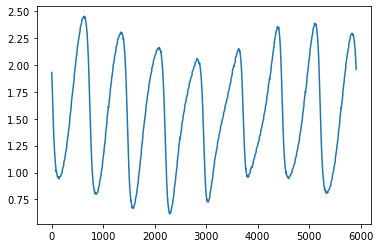

In [380]:
plt.plot(range(5916), np.unwrap(np.radians(l))-np.linspace(0,57,num=5916))

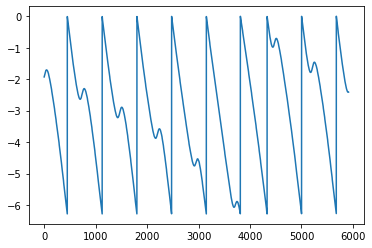

In [382]:
plt.plot(range(5916), -np.radians(l))

* [The PyEphem Tutorial — PyEphem home page](https://rhodesmill.org/pyephem/tutorial.html)

In [2]:
import ephem
import matplotlib.pyplot as plt
import numpy as np

In [3]:
m = ephem.Mars()

In [4]:
m.compute('1584/1/1')

In [5]:
m.ra, m.dec, m.mag

(4.89811066895129, -0.4190875793738444, 1.24)

In [6]:
m0 = ephem.Mars(ephem.Date('1584/1/1'))
m1 = ephem.Mars(ephem.Date('1584/1/1')+1)

In [7]:
def hops(body): return body.hlon, body.hlat

In [8]:
ephem.separation(hops(m0), hops(m1))

0.010442553936505066

In [85]:
d = ephem.Date('1582/11/1')
l = []
for _ in range(1,365*(1600-1582)):
    m0 = ephem.Mars(ephem.Date(d))
    l.append(m0.ra)
    d+=1
l;

In [86]:
len(l)

6569

In [87]:
#plt.plot(range(len(l)), np.unwrap(l)-np.linspace(0,60,num=len(l)))

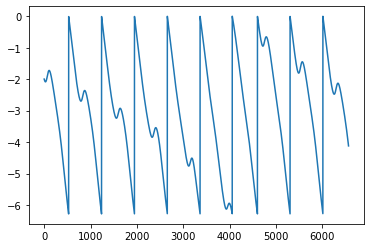

In [88]:
plt.plot(range(len(l)), -np.array(l))

In [89]:
import pandas as pd
import datetime

In [90]:
df = pd.read_excel('http://www.pafko.com/tycho/mars.xls', header=5)

In [91]:
df;

In [92]:
print(ephem.Date(ephem.Date(datetime.datetime(1584,11,23,13,26))+(584484.88-578883.06)))

1600/3/26 09:06:48


In [93]:
df2=df.iloc[:,[14,20]]

In [94]:
df2.set_index('Days since 1 AD', inplace=True)

In [95]:
df2.index.values - df2.index.values[0];

In [96]:
df2.iloc[:,0].values;

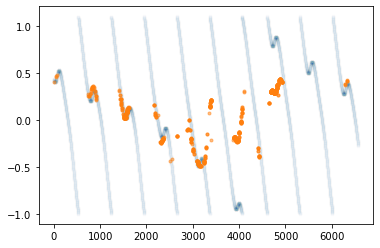

In [99]:
plt.scatter(range(len(l)), -np.array(l)/3+1.1, marker='.', alpha=0.01)
plt.scatter(df2.index.values - df2.index.values[0],
            np.radians(df2.iloc[:,0].values),
            c=None, marker='.', alpha=.5)
plt.show()

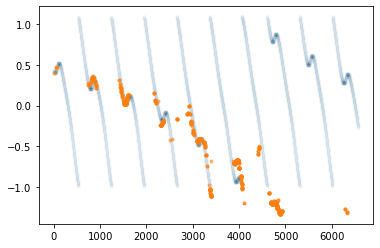

In [97]:
plt.scatter(range(len(l)), -np.array(l)/3+1.1, marker='.', alpha=0.01)
plt.scatter(df2.index.values - df2.index.values[0],
            np.radians(x),
            c=None, marker='.', alpha=.5)
plt.show()

In [51]:
import bisect
bisect.bisect(df2.index.values - df2.index.values[0], 3000)

249

In [82]:
x=np.concatenate([
    df2.iloc[:268,0].values,
    df2.iloc[268,0] * 2 - df2.iloc[268:,0].values])

In [78]:
df2.iloc[268,0]

-25.625

<AxesSubplot:xlabel='Days since 1 AD'>

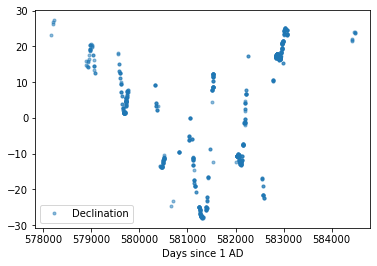

In [98]:
df2.plot(marker='.', linestyle='none', alpha=0.5)

In [47]:
l = []
for d in df2.index:
    ed=ephem.Date(ephem.Date(datetime.datetime(1584,11,23,13,26))+(d-578883.06))
    m=ephem.Mars(ed)
    if -m.ra > 1:
        l.append(-m.ra - 2* np.pi)
    else:
        l.append(-m.ra)
    
l;

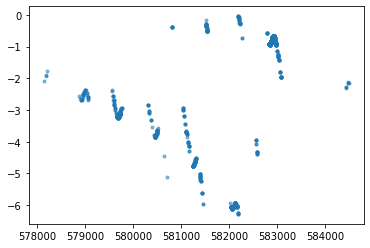

In [50]:
plt.plot(df2.index, l, marker='.', linestyle='none', alpha=0.5)

In [49]:
578150, 584484.88

(578150, 584484.88)

In [292]:
print(ephem.Date(ephem.Date(datetime.datetime(1584,11,23,13,26))+(578150-578883.06)))

1582/11/21 11:59:36
